# (공부) Datamining HW
> 세번째 과제, Tree
- toc:true
- branch: master
- badges: true
- comments: true
- author: 김하영
- categories: [Study]

In [69]:
setwd("/home/khy/Desktop/2022STAT/datamining")

library(randomForest) ##random Forest
library(ipred) ##bagging
library(gbm) ## Boosting
library(xgboost)  ## xgboost  
library(adabag)  ##Adaboosting : boosting
library(rpart)
library(rpart.plot)
library(ggplot2)
library(data.table)
library(rpart)  ##Recursive Partitioning and Regression Trees
library(rpart.plot)
library(tree)
library(ISLR2)

In [301]:
library(tidyverse)

#### 1. 
**다이어그램은 트리로, 트리는 다이어그램으로 그리기**

##### (a) 

In [690]:
X1<-c(1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,0.5,0.5,0.5,-0.5,-0.5,-0.5,0.5,0.5)
X2<-c(2,2,2,2,2,2,2,2,2,2,2,1.5,1.5,1.5,0.5,0.5,0.5,-0.5,0.5)
Y<-c(5,5,5,5,5,5,5,5,5,5,5,15,15,15,3,3,3,10,0)

In [691]:
a<-cbind(X1,X2,Y)
a<-rbind(a,a,a,a,a)
a<-as.data.frame(a)

In [692]:
tree_a<- tree(Y ~ ., data=a);tree_a

node), split, n, deviance, yval
      * denotes terminal node

 1) root 95 1658.00  6.263  
   2) X1 < 1 40 1450.00  8.000  
     4) X2 < 1 25  274.00  3.800  
       8) X2 < 0 5    0.00 10.000 *
       9) X2 > 0 20   33.75  2.250  
        18) X1 < 0 15    0.00  3.000 *
        19) X1 > 0 5    0.00  0.000 *
     5) X2 > 1 15    0.00 15.000 *
   3) X1 > 1 55    0.00  5.000 *

In [693]:
summary(tree_a)


Regression tree:
tree(formula = Y ~ ., data = a)
Number of terminal nodes:  5 
Residual mean deviance:  0 = 0 / 90 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

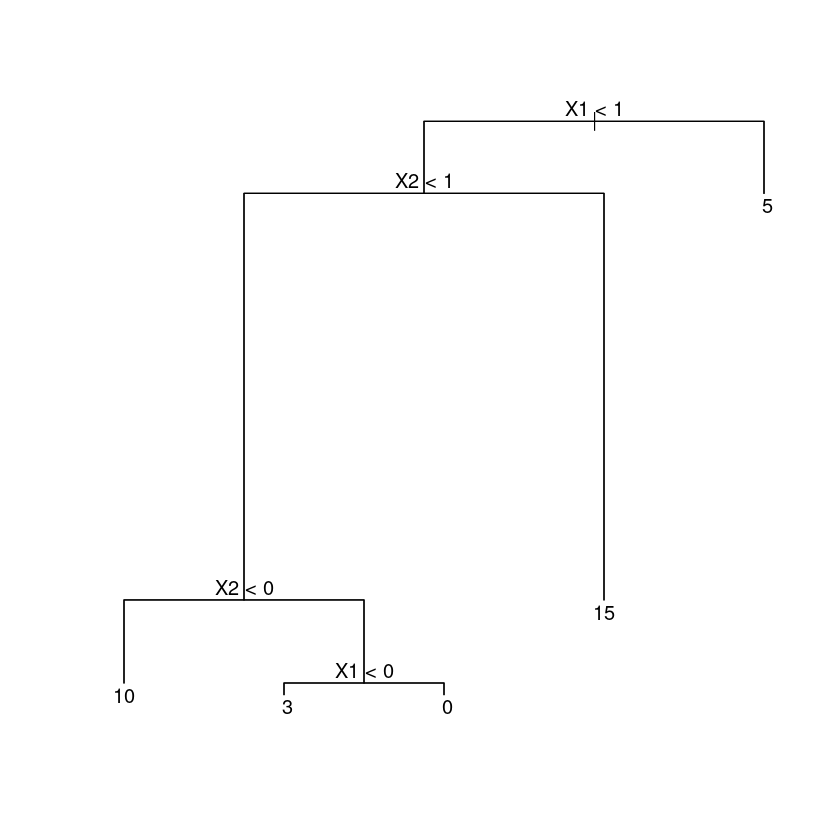

In [694]:
plot(tree_a)
text(tree_a)

##### (b) 

#### 2. 
**불순도 측도로 Gini 지수를 사용했을 때, 첫번째 분리규칙을 찾아라**

- 데이터는 Tree 강의노트 22페이지

In [295]:
dt2<-read.csv('p22.csv')

In [308]:
dt2

age,income,student,credit_rating,buys_computer
<chr>,<chr>,<chr>,<chr>,<chr>
<=30,high,no,fair,no
<=30,high,no,exellent,no
31…40,high,no,fair,yes
>40,medium,no,fair,yes
>40,low,yes,fair,yes
>40,low,yes,exellent,no
31…40,low,yes,exellent,yes
<=30,medium,no,fair,no
<=30,low,yes,fair,yes


In [348]:
dt2 %>% group_by(credit_rating,buys_computer) %>% summarize(n())

`summarise()` has grouped output by 'credit_rating'. You can override using the `.groups` argument.


credit_rating,buys_computer,n()
<chr>,<chr>,<int>
exellent,no,3
exellent,yes,3
fair,no,2
fair,yes,6


- Y는 컴퓨터 구매 여부

In [335]:
#Gini 지수 구하는 함수 만들기
gini<-function(n1,n2,n3,n4){
  d1<-1-(n1/(n1+n2))^2-(n2/(n1+n2))^2
  d2<-1-(n3/(n3+n4))^2-(n4/(n3+n4))^2
  gi<-(n1+n2)/(n1+n2+n3+n4)*d1 +(n3+n4)/(n1+n2+n3+n4)*d2
    
  print(round(d1,2))
  print(round(d2,2))
  print(round(gi,2))
}

In [349]:
gini(3,3,6,2)

[1] 0.5
[1] 0.38
[1] 0.43


##### (a) age 

age={1=30이하, 2=31~40, 3=40초과}

##### (b) income

##### (c) student

##### (d) credit rating

#### 3. 
**‘Carseats.csv’ 데이터를 이용하여 Sales(매출액)을 예측**

In [76]:
dt3<-Carseats

##### (a)
데이터를 training data (60%)와 testing data(40%)로 나누어라.

In [291]:
set.seed(1234)

In [86]:
train_id <- sample(1:nrow(dt3), nrow(dt3)*0.6)
train_dt3 <- dt3[train_id,]
test_dt3 <- dt3[-train_id,]

In [87]:
nrow(dt3)
nrow(train_dt3)
nrow(test_dt3)

[1] 400

[1] 240

[1] 160

In [138]:
head(dt3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


##### (b)
training data를 이용하여 회귀트리를 적합하여라. 그림을 그리고, 결과를 설명하여라. tets MSE는 얼마인가?

###### tree함수로 한거

In [111]:
tree_dt3 <- tree(Sales ~ ., data=train_dt3)
tree_dt3

node), split, n, deviance, yval
      * denotes terminal node

 1) root 240 1992.00  7.426  
   2) ShelveLoc: Bad,Medium 190 1076.00  6.634  
     4) Price < 124.5 126  656.80  7.329  
       8) Age < 50.5 50  259.80  8.527  
        16) Income < 51.5 12   39.79  6.238 *
        17) Income > 51.5 38  137.40  9.249  
          34) Price < 109.5 17   65.40 10.330  
            68) ShelveLoc: Bad 5   15.21  8.524 *
            69) ShelveLoc: Medium 12   27.05 11.080 *
          35) Price > 109.5 21   35.97  8.373 *
       9) Age > 50.5 76  278.10  6.541  
        18) Price < 80.5 6   13.98  9.938 *
        19) Price > 80.5 70  188.90  6.250  
          38) CompPrice < 127 54  124.20  5.884  
            76) Price < 106.5 29   75.75  6.466 *
            77) Price > 106.5 25   27.27  5.210 *
          39) CompPrice > 127 16   33.19  7.483 *
     5) Price > 124.5 64  238.50  5.265  
      10) CompPrice < 147.5 54  181.80  4.945  
        20) Age < 66.5 42  112.20  5.386 *
        21) Age > 6

In [126]:
summary(tree_dt3)


Regression tree:
tree(formula = Sales ~ ., data = train_dt3)
Variables actually used in tree construction:
[1] "ShelveLoc" "Price"     "Age"       "Income"    "CompPrice"
Number of terminal nodes:  15 
Residual mean deviance:  2.403 = 540.6 / 225 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5.01600 -0.96420  0.04807  0.00000  1.02800  4.71400 

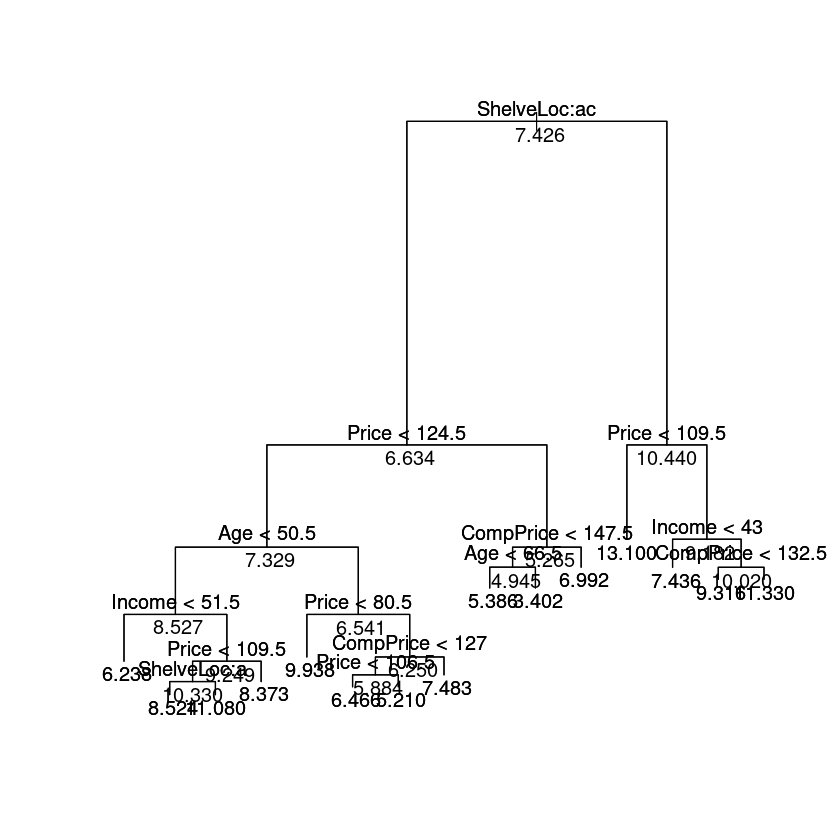

In [110]:
plot(tree_dt3)
text(tree_dt3)
text(tree_dt3, all=T)

In [118]:
yhat <- predict(tree_dt3 , newdata = test_dt3)

In [119]:
mean((yhat-test_dt3$Sales)^2)

[1] 4.82599

###### rpart함수로 한거

In [155]:
cart_dt3 <- rpart(Sales ~., data=train_dt3)

In [156]:
summary(cart_dt3)

Call:
rpart(formula = Sales ~ ., data = train_dt3)
  n= 240 

           CP nsplit rel error    xerror       xstd
1  0.28718446      0 1.0000000 1.0049634 0.09317580
2  0.09079237      1 0.7128155 0.7237491 0.06357243
3  0.08374733      2 0.6220232 0.7395989 0.06172782
4  0.05969724      3 0.5382758 0.6067556 0.05264454
5  0.04151085      4 0.4785786 0.6278392 0.05774770
6  0.02667906      5 0.4370677 0.6064115 0.05758255
7  0.02488062      6 0.4103887 0.6312337 0.05682588
8  0.01809132      7 0.3855081 0.6386965 0.05893900
9  0.01808094      9 0.3493254 0.6256794 0.05913031
10 0.01762513     10 0.3312445 0.6256794 0.05913031
11 0.01121466     11 0.3136194 0.6216039 0.06065912
12 0.01063878     12 0.3024047 0.6198450 0.05971397
13 0.01000000     13 0.2917659 0.6190801 0.05972973

Variable importance
  ShelveLoc       Price   CompPrice         Age      Income Advertising 
         34          29          11           9           9           3 
 Population   Education          US       U

In [158]:
cart_dt3$variable.importance

ShelveLoc       Price   CompPrice         Age      Income Advertising 
  594.31524   510.51561   197.84956   165.24236   149.89708    50.00539 
 Population   Education          US       Urban 
   36.47976    31.44132    12.97821    12.16045

,CP,nsplit,rel error,xerror,xstd
1,0.28718446,0,1.0000000,1.0049634,0.09317580
2,0.09079237,1,0.7128155,0.7237491,0.06357243
3,0.08374733,2,0.6220232,0.7395989,0.06172782
4,0.05969724,3,0.5382758,0.6067556,0.05264454
5,0.04151085,4,0.4785786,0.6278392,0.05774770
6,0.02667906,5,0.4370677,0.6064115,0.05758255
7,0.02488062,6,0.4103887,0.6312337,0.05682588
8,0.01809132,7,0.3855081,0.6386965,0.05893900
9,0.01808094,9,0.3493254,0.6256794,0.05913031
10,0.01762513,10,0.3312445,0.6256794,0.05913031



Regression tree:
rpart(formula = Sales ~ ., data = train_dt3)

Variables actually used in tree construction:
[1] Age       CompPrice Income    Price     ShelveLoc

Root node error: 1991.7/240 = 8.2987

n= 240 

         CP nsplit rel error  xerror     xstd
1  0.287184      0   1.00000 1.00496 0.093176
2  0.090792      1   0.71282 0.72375 0.063572
3  0.083747      2   0.62202 0.73960 0.061728
4  0.059697      3   0.53828 0.60676 0.052645
5  0.041511      4   0.47858 0.62784 0.057748
6  0.026679      5   0.43707 0.60641 0.057583
7  0.024881      6   0.41039 0.63123 0.056826
8  0.018091      7   0.38551 0.63870 0.058939
9  0.018081      9   0.34933 0.62568 0.059130
10 0.017625     10   0.33124 0.62568 0.059130
11 0.011215     11   0.31362 0.62160 0.060659
12 0.010639     12   0.30240 0.61984 0.059714
13 0.010000     13   0.29177 0.61908 0.059730


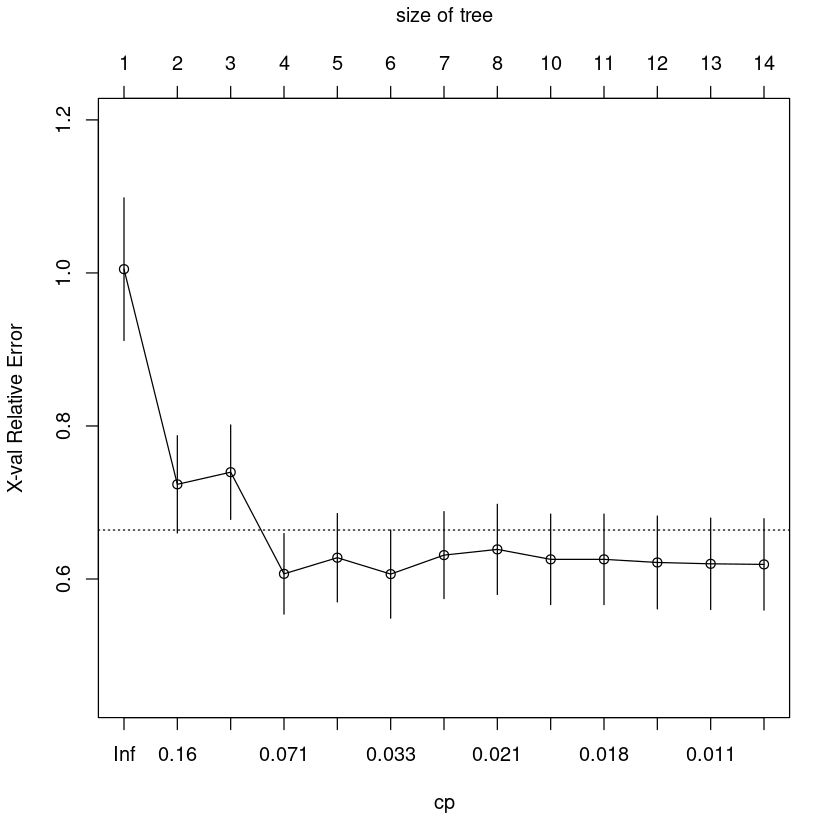

In [159]:
cart_dt3$cptable  ##complexity parameter 
printcp(cart_dt3)
plotcp(cart_dt3)

- cp=0.065 채택

In [160]:
cart_yhat <- predict(cart_dt3, newdata = test_dt3)

In [161]:
mean((cart_yhat-test_dt3$Sales)^2)

[1] 4.581141

##### (c)
tree의 complexity를 고려하여 가지치기를 시행하여라. 가지치기 시행으로 test MSE는 향상되었는가?

###### tree함수로 한거

In [122]:
cv_dt3 <- cv.tree(tree_dt3,FUN = prune.tree, K=10)
cv_dt3

$size
 [1] 15 14 13 12 11 10  8  7  6  5  4  3  2  1

$dev
 [1] 1192.136 1191.730 1191.730 1208.592 1144.229 1175.174 1175.174 1160.314
 [9] 1222.385 1236.727 1381.659 1461.555 1481.733 2050.289

$k
 [1]      -Inf  21.17523  21.18904  23.13336  31.54562  36.01143  36.03209
 [8]  49.55421  75.18473  82.67628 118.89773 166.79779 180.82926 571.97924

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

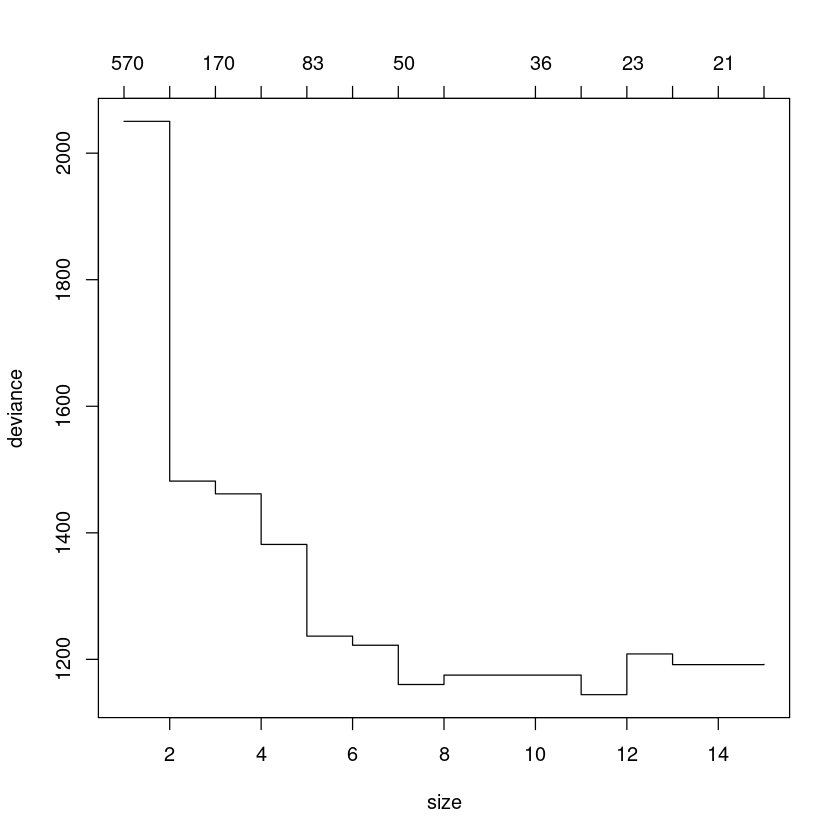

In [125]:
plot(cv_dt3)

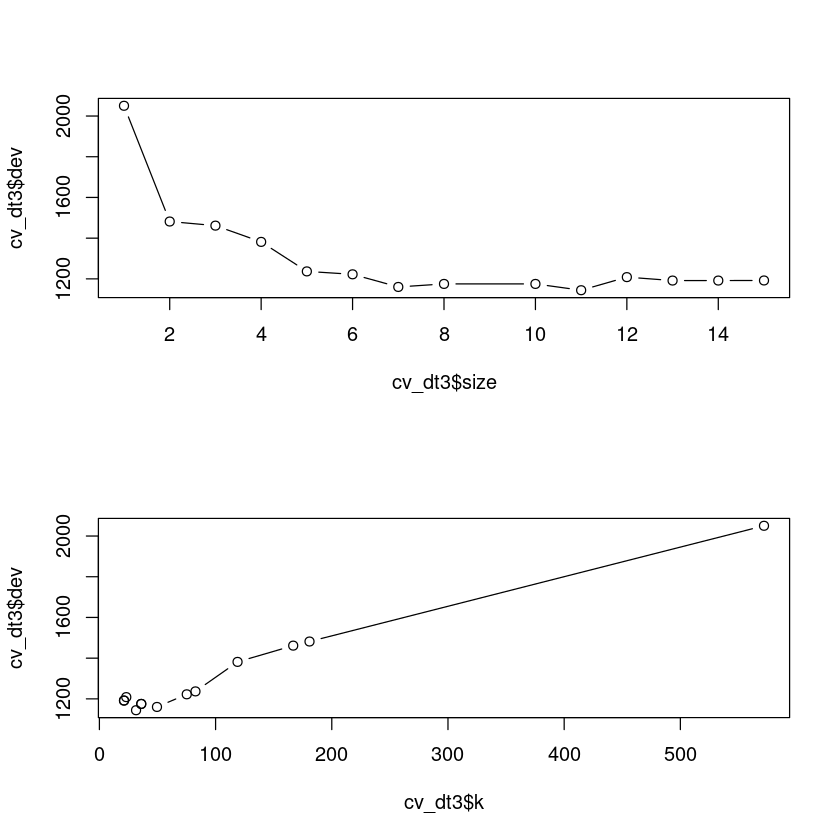

In [124]:
par(mfrow = c(2,1))
plot(cv_dt3$size, cv_dt3$dev, type = "b")
plot(cv_dt3$k, cv_dt3$dev, type = "b")

- 터미널 노드=7로 결정

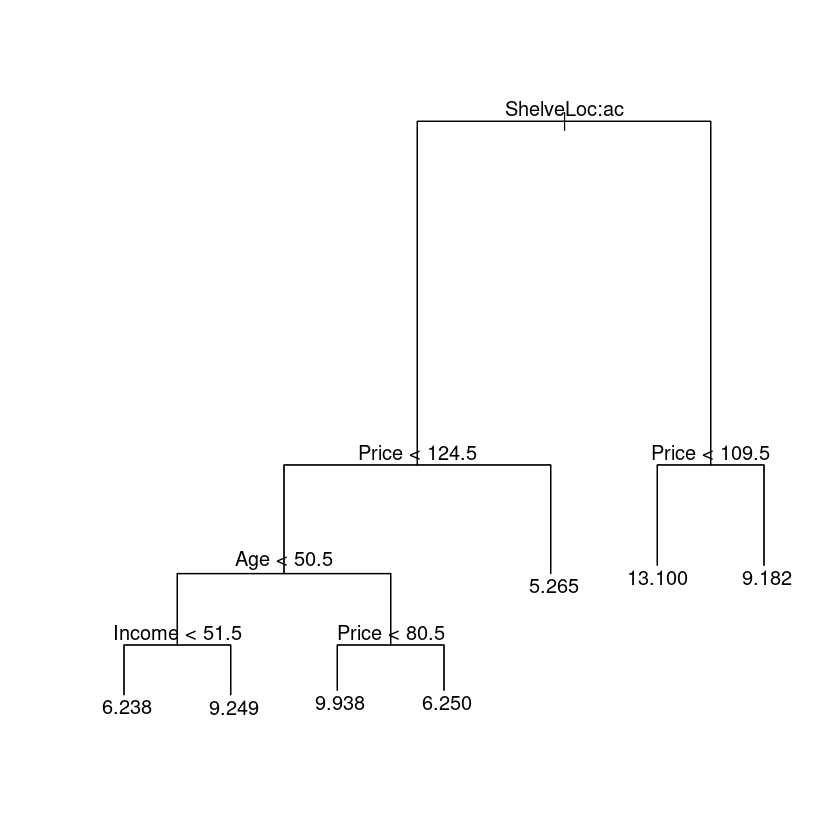

In [133]:
fin.tree_dt3 <- prune.tree(tree_dt3, best=7)
plot(fin.tree_dt3)
text(fin.tree_dt3)

In [164]:
fin.tree_yhat <- predict(fin.tree_dt3 , newdata = test_dt3)

In [165]:
mean((fin.tree_yhat-test_dt3$Sales)^2)

[1] 5.347497

###### rpart함수로 한거

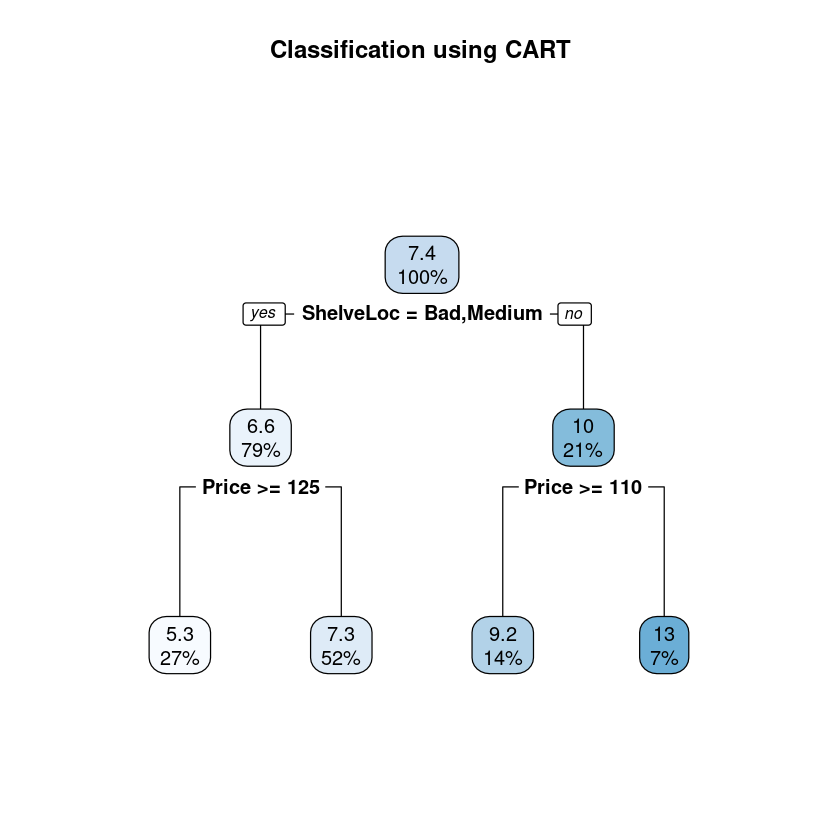

In [163]:
prune_cart_dt3 <- rpart(Sales ~ ., data=train_dt3,
                  control = rpart.control(cp = 0.065))
             

rpart.plot(prune_cart_dt3, main = "Classification using CART")

In [168]:
cart_yhat <- predict(prune_cart_dt3, newdata = test_dt3)
mean((cart_yhat-test_dt3$Sales)^2)

[1] 5.578665

- 오히려 MSE가 증가함...

##### (d)
Bagging을 시행하여라. tets MSE는 얼마인가?

In [174]:
bagg_dt3<- ipredbagg(train_dt3$Sales, 
                     train_dt3[,-1],
                     nbagg=1000, 
                     coob=T)  

In [175]:
bagg_dt3
bagg_dt3$err


Bagging regression trees with 1000 bootstrap replications 
Out-of-bag estimate of root mean squared error:  1.7935 


[1] 1.793517

In [176]:
bagg_yhat<-predict(bagg_dt3, 
              newdata = test_dt3)
mean((bagg_yhat-test_dt3$Sales)^2)

[1] 3.022857

##### (e)
Random Forest를 시행하여라. tets MSE는 얼마인가? 변수중요도를 수하여라. m = 1, 10을 포함하여 m값을 변화시키면서 tets MSE를 비교하고, 이 때 m의 효과를 설명하여라.

In [177]:
ls(dt3)

[1] "Advertising" "Age"         "CompPrice"   "Education"   "Income"     
 [6] "Population"  "Price"       "Sales"       "ShelveLoc"   "Urban"      
[11] "US"

In [272]:
rf_dt3 <- randomForest(Sales ~ ., 
                          data = train_dt3,
                          ntree=500,
                          mtry = 3, 
                          importance = TRUE,
                          xtest=test_dt3[,-1], 
                          ytest=test_dt3$Sales
                        )
#tree는 default값, mtry=10/3=3

In [285]:
nrow(test_dt3[,-grep('Sales', names(train_dt3))])

[1] 160

In [286]:
nrow(test_dt3[,-1])

[1] 160

In [288]:
nrow(subset(test_dt3, select=-Sales))

[1] 160

In [273]:
rf_dt3


Call:
 randomForest(formula = Sales ~ ., data = train_dt3, ntree = 500,      mtry = 3, importance = TRUE, xtest = test_dt3[, -1], ytest = test_dt3$Sales) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 3.17909
                    % Var explained: 61.69
                       Test set MSE: 2.52
                    % Var explained: 66.18

In [274]:
rf_yhat <- rf_dt3$test$predicted 
mean((rf_yhat-test_dt3$Sales)^2)

[1] 2.515699

`-` 지금까지 test mse중 가장 작다.

- 변수중요도

In [275]:
rf_dt3$importance
rf_dt3$importanceSD

,%IncMSE,IncNodePurity
CompPrice,0.642369935,183.94439
Income,0.093683813,143.18937
Advertising,0.552449296,147.32821
Population,-0.032227587,122.09938
Price,3.078087541,468.95189
ShelveLoc,3.973171994,489.74896
Age,0.596036294,195.40565
Education,0.170629328,98.54860
Urban,-0.004312315,18.66009
US,0.028852212,19.28311


CompPrice      Income Advertising  Population       Price   ShelveLoc 
 0.04890338  0.03792558  0.04467397  0.03128564  0.07952094  0.09023539 
        Age   Education       Urban          US 
 0.04606664  0.03274020  0.01411844  0.01843769

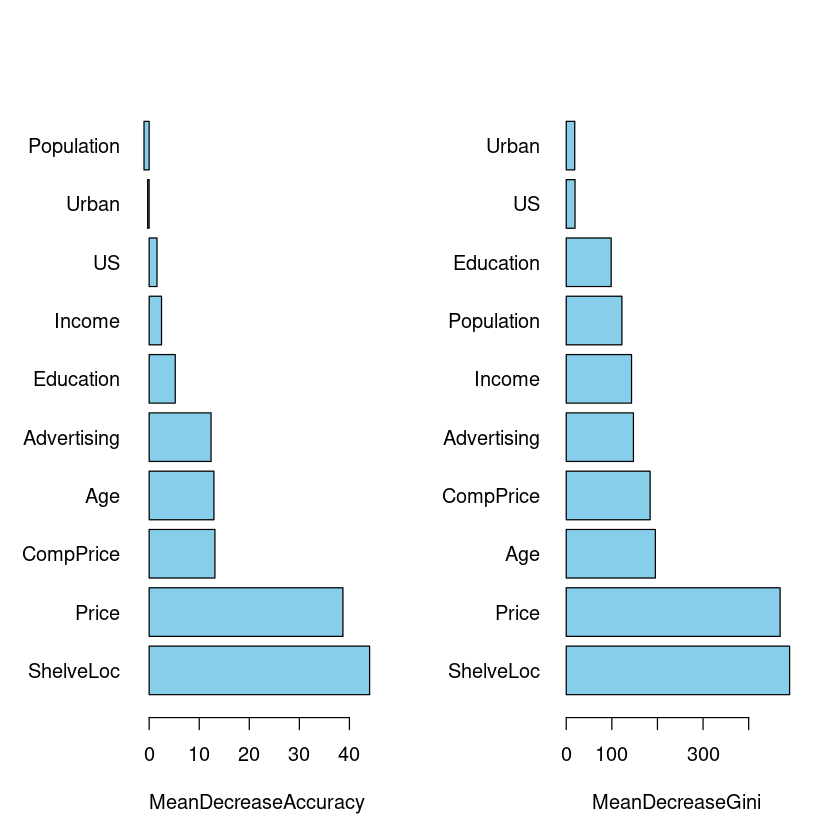

In [276]:
par(mar = c(5.1, 6, 4.1, 2.1))
#c(5.1, 4.1, 4.1, 2.1)## default
par(mfrow=c(1,2))
barplot(sort(importance(rf_dt3)[,"%IncMSE"], decreasing = T), 
        horiz = T,las=1,
        col='skyblue',
        xlab = "MeanDecreaseAccuracy")

barplot(sort(importance(rf_dt3)[,"IncNodePurity"], decreasing = T), 
        horiz = T,las=1,
        col='skyblue',
        xlab = "MeanDecreaseGini")

- m의 효과

In [277]:
mtry_rf_dt3 <- function(m){
  return(randomForest(Sales ~ ., 
                      data = train_dt3,
                      mtry = m)$mse)
}

In [278]:
tmp_dt <- data.table( num_tree = 1:500,
                      rf_1 = mtry_rf_dt3(1),
                      rf_3 = rf_dt3$mse,
                      rf_5 = mtry_rf_dt3(5),
                      rf_7 = mtry_rf_dt3(7),
                      rf_10 = mtry_rf_dt3(10),
                      rf_test = rf_dt3$test$mse)

In [279]:
melt.tmp <- melt(tmp_dt, id=1)

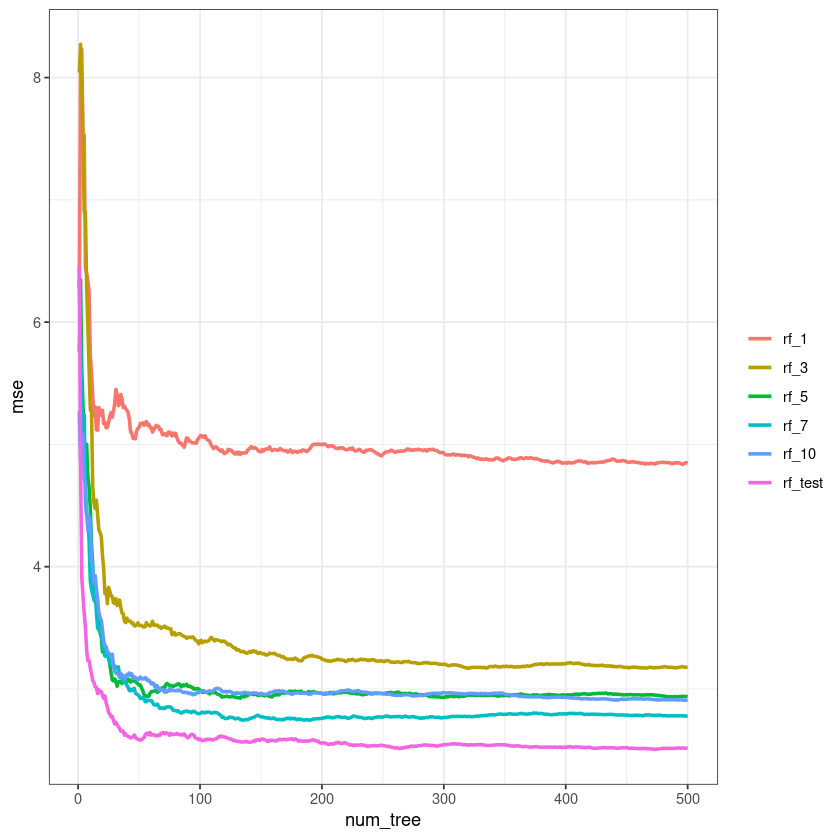

In [280]:
ggplot(melt.tmp, aes(num_tree, value, col=variable)) + geom_line(lwd=1) +
  labs(y='mse', col="") + theme_bw()

`-` 설명변수를 1개만 썼을 때 성능이 너무 안좋고, 7개를 사용했을 때가 가장 낮음. test가 엄청 낮게 나왔다.. de-correlation효과보다는 개별 트리의 적합도가 감소하는 효과가 컸던 모양이다.

#### 4. 
**‘OJ.csv’ 데이터를 이용**

In [292]:
dt4<-OJ

##### (a)
800개의 관측값으로 구성된 training data를 만들고, 나머지를 포함하는 testing data를 구성하여라.

##### (b) 
training data를 이용하여 반응변수를 Purchase로 하는 tree를 적합하여라. 결과를 설명하여라. training error는 얼마인가? terminal node의 갯수는 몇개인가?

##### (c) 
tree의 그림을 그리고 결과를 설명하여라.

##### (d) 
testing data를 이용하여 예측을 하고, confusion matrix를 생성하여라. test error은 얼마인가?

##### (e) 
cptable 및 그림을 이용하여 최적의 tree를 구하여라.

##### (f)
가지치기 전/후 tree의 training error를 비교하여라.

##### (g)
가지치기 전/후 tree의 test error를 비교하여라